# 2. Input/Output



## 2.1. Printf:

    printf("%s %d %s", "Il valore", a, "è un numero intero");

    printf("Il valore %d è un numero intero", a);

Il formato generale di printf è:

    printf(format,arg1,arg2,...)

I caratteri all'interno della stringa di formato, se non sono preceduti da % (ovvero se sono tutti caratteri normali) vengono stampati come tali. 

    printf("Bla");

    => Bla

Altrimenti ogni % è seguito da caratteri che descrivono in quale formato dev'essere mostrato il corrispondente argomento.
In generale ad ogni % deve corrispondere un argomento nella lista di argomenti.
Il tipo del valore da stampare dev'essere consistente con la specificazione di formattazione fatta da printf, cioè, se si chiede a printf di stampare un float, il valore da dare deve anche essere un float.

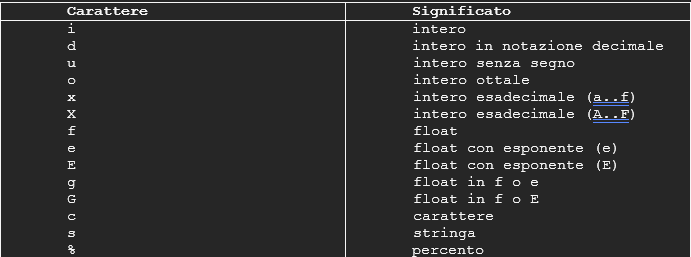

I primi 5 caratteri vengono usati per visualizzare numeri interi. Siccome un char può anche essere letto come intero, anche questo può venir visualizzato con questi caratteri.
Il carattere %u serve a mostrare un unsigned int, ma può anche servire per forzare un int a venir mostrato come unsigned int.
Per %o, %x e %X printf non stampa i caratteri 0 o 0x, che precedono i valori ottale e esadecimale, ma solo il valore. Se si desidera mostrare la notazione, si deve inserire # in questo modo: %#o, rispettivamente %#x.
I seguenti 5 caratteri servono a visualizzare numeri reali (float oppure double). Il primo, %f, stampa per default fino a 6 cifre di precisione, il secondo e il terzo usano la forma esponenziale con una mantissa di 6 decimali e un esponente di almeno 2. L'ultima coppia (%g e %G) sceglie , invece, a seconda del numero da stampare, se conviene usare %f oppure %e (o %E).
Il formato %c mostra un carattere singolo, come:

    char ch = 'A';
    printf("%c\n", ch);

Anche un intero può essere utilizzato. Verrà però stampato con il suo carattere corrispondente in codice ASCII:

    printf("%c\n",7)

Il formato %s serve a stampare una stringa. Questa deve contenere alla fine il carattere di terminazione, altrimenti vengono stampati tutti gli elementi in memoria fino a trovare un carattere nullo.
L'ultima conversione è %%, cioè la possibilità di stampare il carattere di percentuale:

    printf("Sconto del %d%%", discount);

Il formato per printf non offre però solo la possibilità di definire il tipo, ma anche alcuni parametri, come il numero di cifre decimali, la larghezza, ecc.
Il formato generale è il seguente:

%[flags][width][.prec][l]type





In [ ]:
#include <stdio.h>

int main() 
{
    char ch = 'A';
    
    printf("Stampa carattere:       %c\n", ch);
    printf("Stampa valore (codice): %d\n", ch);
    
    return 0;  
}



### Significato degli elementi opzionali

    Flags:
        -:	Allinea il valore a sinistra
        +:	Precede il valore con + o -
        spazio: Precede un valore positivo con lo spazio
        #:	Precede un valore ottale con 0, un valore esadecimale con 0x, mostra il punto decimale con floats, lascia in %g (o %G) gli zeri non significativi.


    Width: Larghezza minima del campo; * significa prendere il prossimo argomento come larghezza del campo.


    Prec: Numero minimo di cifre per interi; numero di cifre decimali per %e e %E; numero massimo di cifre significative da mostrare per %g e %G; numero massimo di caratteri per %s; * significa prendere il prossimo argomento come grandezza.


    l: Stampa long int

Normalmente printf stampa solo i caratteri necessari. 
L'opzione width serve a evitare questo. Se ci sono meno caratteri di quanto è la larghezza, il valore viene allineato a destra. Per allinearlo a sinistra è necessario avere un - specificato nei flags.
Se però il valore di width è minore della larghezza da stampare, viene semplicemente ignorato.

    printf(":%6d:\n",100)
    => :   100:

    printf(":%-6d:\n",100)
    => :100   :

    printf(":%1d:\n",100)
    => :100:


In [ ]:
#include <stdio.h>

int main() 
{
    printf(":%6d:\n",100);
    printf(":%-6d:\n",100);
    printf(":%1d:\n",100);
    
    return 0;  
}

È inoltre possibile specificare il campo width come parametro della funzione printf. Per fare questo è necessario specificare * al posto della larghezza e sostituirlo con un valore nel parametro corrispondente. Se ad esempio la variabile width valesse 10:

    printf("%*d", width, result);

il valore di result verrebbe mostrato in 10 caratteri allineato a destra.


In [ ]:
#include <stdio.h>

int main() 
{
    for (int i = 1; i < 10; i++) {
        printf("%*d\n", i, 100);
    }
    
    return 0;  
}

Prec è un punto seguito da un valore intero. Questo specifica la precisione del valore da stampare.
Davanti a un convertitore per interi sta a significare il numero minimo di cifre da mostrare:

    printf("%.6d", 100);
    => 000100

Davanti a %f, %e o %E dà il numero di valori decimali da mostrare. Il valore viene automaticamente arrotondato:

    printf("%.2f", 100.1493);
    => 100.15

Davanti a %g e %G specifica il numero massimo di cifre significative.
Davanti a %s determina il numero massimo di caratteri da mostrare (se la stringa è più corta i caratteri saranno ancora meno):

    printf("%.4s", "abcdefghi");
    => abcd

Anche prec può essere specificato come argomento:

    printf("Il risultato è %.*f\n",places, result);

È anche possibile specificare più parametri come argomenti:

    printf(":%*.*d:\n",10,6,100);
    => :    000100:

Stampa 100 in un campo di 10 caratteri stampandone almeno 6.

L'opzione l serve a stampare valori long int:

    printf("%ld\n",lval);

In [ ]:
#include <stdio.h>

int main() 
{
    printf("%.6d\n", 100);   
    printf("%.2f\n", 100.1493);
    printf("%.4s\n", "abcdefghi");
    printf("%.*f\n", 2, 10.123);
    printf(":%*.*d:\n",10,6,100);
    
    return 0;  
}

### Caratteri escape usati

    \n	Fine riga (a capo)

    \r	Riposiziona il cursore dov'era prima del printf

    \t	Tabulatore

    \v	Tabulatore verticale

    \f	Salto pagina

    \a	Allarme

    \b	Backspace


### Clearscreen da terminale

Per poter effettuare un'operazione di clearscreen da terminale, è necessario passare i caratteri "escape" con la funzione printf.

    Clear:	printf("\033[2J");
    Home:	printf("\033[1;1H");

### Annotazioni Java

La funzione printf() è stata aggiunta in Java a partire dalla sua versione 5, proprio per dare agli sviluppatori Java le stesse possibilità di formattazione di testo a disposizione dei programmatori C.
Il metodo printf() è specificato nella classe PrintWriter, quella che permette chiamate di questo tipo: 

    System.out.printf(…);

Il meccanismo di formattazione è però disponibile (e implementato) nel metodo static format() della classe String. Questo metodo può essere usato anche solo semplicemente per eseguire trasformazioni in stringhe, come nell’esempio che segue. 

    int val = 5;
    String valAsString = String.format(“%d”, val);

Per ottenere un meccanismo simile in C, bisogna invece usare la funzione sprintf(), come vedremo in seguito. 






## 2.2.  Scanf

    scanf("%d",&a);

Legge nel programma dati in modo formattato. La variabile in cui devono essere letti i dati dev'essere passata con il suo indirizzo.
I possibili caratteri di conversione sono i seguenti:

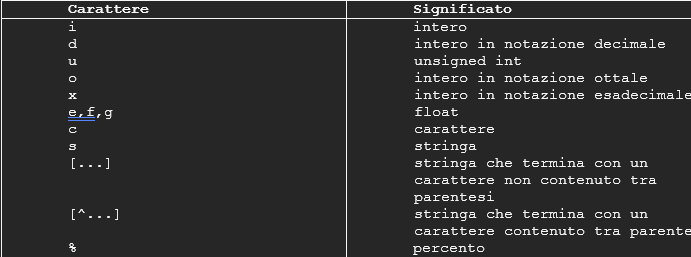

Con %e, %f e %g si leggono numeri float, che non devono necessariamente essere espressi con il punto. Possono contenere l'esponente.
Leggendo una stringa con %s, in cui la stringa termina con uno spazio (space, tab, newline).
Se si vuole definire la fine della lista in altro modo, basta utilizzare la possibilità data da [...] e [^...], cioè quella di definire i caratteri validi o quelli non validi (terminazione della stringa).

    scanf("%[a-z]",letters);

Viene letta una stringa da input fino a quando si incontra un carattere che non sia una lettera minuscola. Mentre qui sotto vengono lette sia minuscole che maiuscole:

    scanf("%[a-zA-Z]",letters);

Il primo che segue legge invece tutto fino a una virgola o un punto, mentre il secondo accetta tutto fino al newline:

    scanf("%[^,.]",letters);
    scanf("%[^\n]",letters);

Anche scanf, come printf, offre la possibilità di definire delle opzioni, il suo formato generale è il seguente:

	%[*][size][l][h]type

In [ ]:
#include <stdio.h>

int main() 
{
    int val;
    
    printf("Inserire un valore intero: ");
    scanf("%d", &val);
    
    printf("Valore letto da tastiera: %d\n", val);
    
    return 0;  
}

In [ ]:
#include <stdio.h>

int main() 
{
    float fval;
    
    printf("Inserire un valore float: ");
    scanf("%f", &fval);
    
    printf("Valore letto da tastiera: %f\n", fval);
    
    return 0;  
}

In [ ]:
#include <stdio.h>

int main() 
{
    char letters[100];
    
    printf("Inserire un valore float: ");
    scanf("%[a-z]",letters);
    
    printf("Sequenza letta %s\n", letters);
    
    return 0;  
}

### Significato degli elementi opzionali

    *	Il campo dev'essere saltato e non letto


    size:	Grandezza massima del campo in input


    l:	Il valore dev'essere registrato in un long int o in un double


    h:	Il valore da leggere dev'essere registrato in un short int


    type:	Carattere di conversione

Il parametro da passare a scanf dev'essere l'indirizzo di una variabile, il cui tipo deve corrispondere a quello del valore da leggere.
L'asterisco * sta a significare che scanf deve "saltare" il valore che segue, cioè non assegnarlo a nessuna variabile. La chiamata

    scanf("%d %*s %d", &v1, &v2);

indica di leggere un intero, seguito da una stringa, seguito da un altro intero. La stringa deve però essere ignorata, e nelle due variabili devono essere letti i due interi.
Scanf ritorna il numero di valori assegnati, e non letti. In questo caso ritorna 2 e non 3.
L'opzione size specifica la lunghezza massima del campo da leggere. È utile soprattutto con le stringhe:

     char word[10];
     scanf("%9s", word);

Questo assicura che l'array word non vada in "overflow". Scanf piazza automaticamente un carattere '\0' alla fine della stringa.
Questo tipo di specificazione è anche utile per leggere numeri vicini. La chiamata:

     scanf("%3d%2d", &part, &lot);

con l'input: 97623 permette di leggere 976 in part e 23 in lot.

Con tutti i caratteri di conversione tranne [] e %c, scanf salta ogni carattere vuoto prima di iniziare a leggere l'input. Poi legge fino a quando trova un carattere non valido per quel tipo di input. 
Importante: la prossima chiamata di scanf leggerà a partire dal carattere che ha causato l'interruzione precedente. Ecco alcuni esempi:

    scanf ("%d %s", &val, buf);

Legge un numero intero e una stringa, sia che siano attaccati, sia che siano separati da uno spazio, sia che siano separati da una serie di spazi e newline. La stringa è la serie di caratteri prima del prossimo blank. L'input:

    -123    test string

verrà letto in questo modo: -123 in val, "test" in buf.




### Esempio 1

Il prossimo programma serve a vedere l'importanza dei caratteri vuoti quando si legge caratteri:

In [ ]:
#include <stdio.h>

int main()
{
   char c1,c2,c3;
   scanf("%c%c%c", &c1,&c2,&c3);
   printf(":%c%c%c:\n", c1,c2,c3);

   return 0;
}


    (_ sta per "blank", spazio)
    
    Input: x_y
    Output: :x y:
    
    Input: _x_y
    Output: : x :
    

Un particolare importante nell'utilizzo di scanf è che si inserisce uno spazio nel parametro di controllo, questo significa che verranno "saltati" tutti gli spazi. Se cioè lo scanf precedente fosse stato scritto:

    scanf("%c %c %c", &c1,&c2,&c3);

l'input con spazi avrebbe dato un risultato diverso:


In [ ]:
#include <stdio.h>

int main()
{
   char c1,c2,c3;
   scanf("%c %c %c", &c1,&c2,&c3);
   printf(":%c%c%c:\n", c1,c2,c3);

   return 0;
}



    Input: x         y         z
    Output: :xyz:
    
Altri esempi:

    scanf(" %[a..z]", str);
    -> salta gli spazi iniziali, legge tutto quello che trova fino a trovare un carattere che non sia incluso nell'insieme definito.

    scanf("%[a..z]", str);
    -> legge tutto (anche gli spazi o i newline iniziali) fino a trovare un carattere che non sia incluso nell'insieme definito.

    scanf(" %[^\n]", str);
    -> legge tutto (anche gli spazi o i newline iniziali) fino al prossimo newline dopo la stringa.

In [ ]:
#include <stdio.h>

int main()
{
    char str[100];
    
    scanf(" %[a..z]", str);
    printf("Output: %s\n", str);
    
    return 0;
}



### Caratteri non di formattazione

Ogni carattere nella stringa di formattazione che non sia di formattazione, deve essere ritrovato come tale nell'input. Quindi per leggere una data nel formato gg/mm/aa, potrebbe venir usato lo scanf seguente:

    scanf("%d/%d/%d",&day, &month, &year);
    
    12/4/94
    12 /    4/    94
    12    /4x94

Leggerebbe il primo input, ma non gli altri due.
